In [1]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.decomposition import PCA
import sys
root = "/project/wyin/jlee/ml-project/inverse-problem"
util_loc = os.path.join(root, "utils")
data_loc = os.path.join(root, "data")
sys.path.append(util_loc)
from utilities import InverseNeuralNet, InverseDataModule, ScaledData, see_results

In [2]:
data = ScaledData(data_loc)

trying n neights = 1
(13265, 3)
trying n neights = 2
(13265, 3)
trying n neights = 3
(13265, 3)
trying n neights = 4
(13265, 3)
trying n neights = 5
(13265, 3)
trying n neights = 6
(13265, 3)
trying n neights = 7
(13265, 3)
trying n neights = 8
(13265, 3)
trying n neights = 9
(13265, 3)
5.674911119487375e-05
5


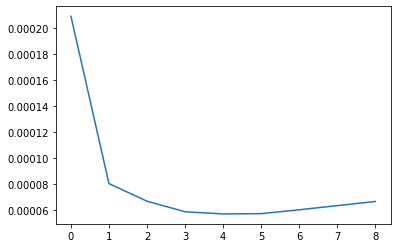

In [3]:
knn_mse_uniform = []
for i in range(1, 10):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(data.train_dos, data.train_params)
    predicted = neigh.predict(data.val_dos)
    print(predicted.shape)
    
    mse = np.mean((data.val_params - predicted)**2)
    knn_mse_uniform.append(mse)
    
knn_mse_uniform = np.array(knn_mse_uniform)
plt.plot(knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

In [6]:
#Results visualization on validation set
best_model = KNeighborsRegressor(n_neighbors = 5)
best_model.fit(data.train_dos, data.train_params)
predicted = best_model.predict(data.test_dos)

mse_mat = (predicted - data.test_params) ** 2
mse_list = np.mean(mse_mat, axis = 1)
mse_params = zip(mse_list, predicted, data.test_params)
mse_params = sorted(mse_params, key = lambda x : x[0], reverse = True)
num_points = len(mse_list)

In [7]:
print("Nearest neighbor results on test set:")
for i in range (10):
    index = i * (num_points // 100)
    print(f"{i} percentile: ")
    
    t1_pred, t2_pred, j_pred = mse_params[index][1]
    t1, t2, j = mse_params[index][2]
    
    print(f"Knn predicted: t1: {t1_pred:.4f}, t2: {t2_pred:.4f}, j: {j_pred:.4f}")
    print(f"Ground truth: t1: {t1}, t2: {t2}, j: {j}")
    print()

Nearest neighbor results on test set:
0 percentile: 
Knn predicted: t1: -0.2840, t2: -0.2640, j: 0.3120
Ground truth: t1: -0.36, t2: -0.18, j: 0.328

1 percentile: 
Knn predicted: t1: -0.4520, t2: -0.4360, j: 0.4528
Ground truth: t1: -0.48, t2: -0.4, j: 0.44

2 percentile: 
Knn predicted: t1: -0.2960, t2: -0.1680, j: 0.7408
Ground truth: t1: -0.32, t2: -0.14, j: 0.744

3 percentile: 
Knn predicted: t1: 0.0600, t2: 0.0360, j: 0.2800
Ground truth: t1: 0.04, t2: 0.06, j: 0.28

4 percentile: 
Knn predicted: t1: 0.2760, t2: -0.4440, j: 0.3280
Ground truth: t1: 0.26, t2: -0.46, j: 0.344

5 percentile: 
Knn predicted: t1: 0.4760, t2: 0.2240, j: 0.5616
Ground truth: t1: 0.48, t2: 0.2, j: 0.568

6 percentile: 
Knn predicted: t1: -0.0160, t2: -0.0640, j: 0.8592
Ground truth: t1: 0.0, t2: -0.08, j: 0.856

7 percentile: 
Knn predicted: t1: -0.3520, t2: -0.4840, j: 0.3856
Ground truth: t1: -0.34, t2: -0.5, j: 0.392

8 percentile: 
Knn predicted: t1: -0.3640, t2: 0.3120, j: 0.2000
Ground truth: t1: 

model mse: 5.50649902005126e-05


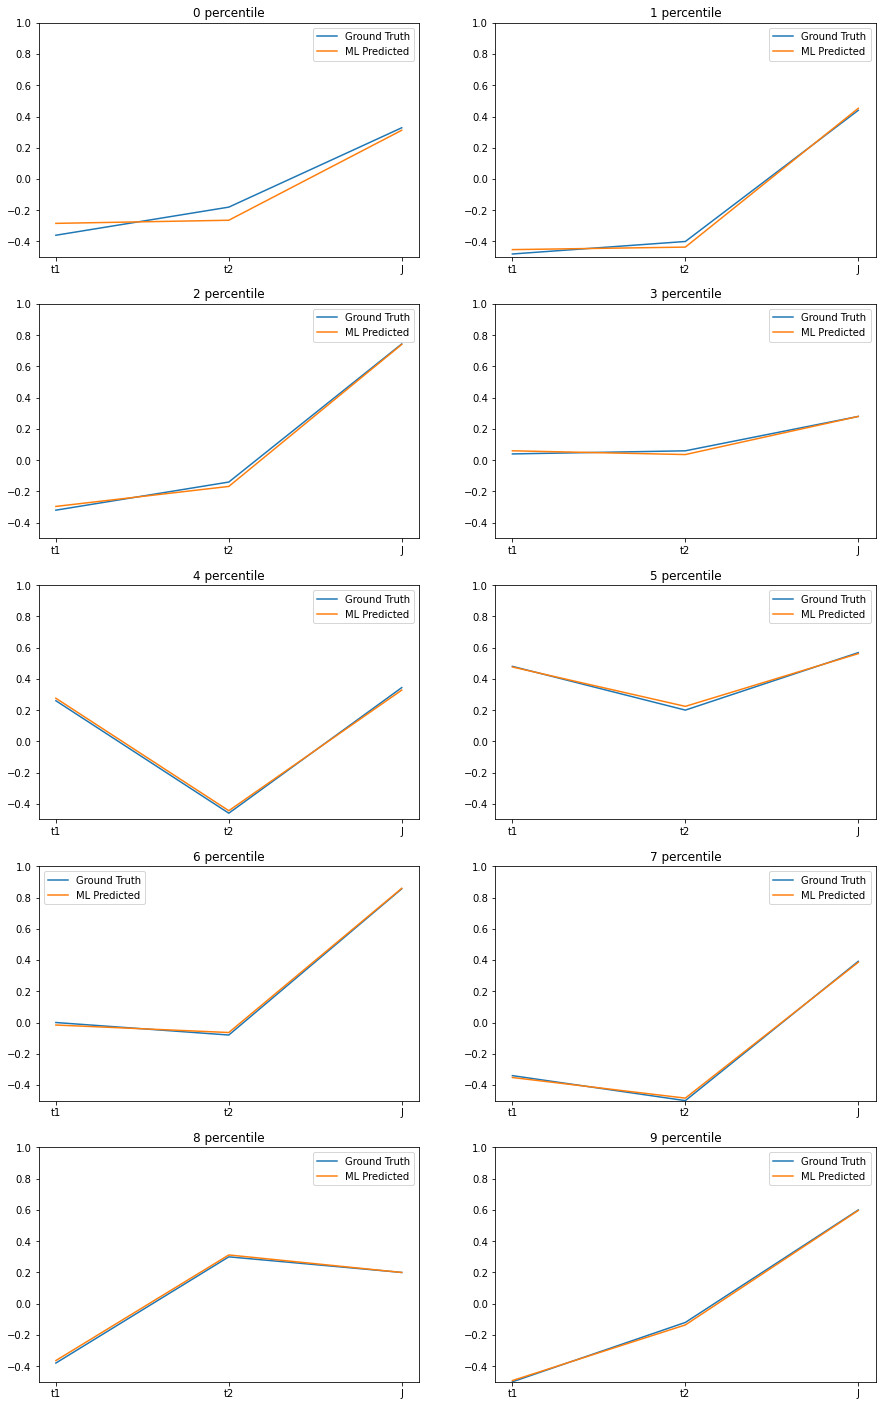

In [8]:
see_results(predicted, data.test_params, (5, 2), np.arange(0, 10))